In [1]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

In [25]:
# For this dataset we try to predict number of installs
df_mat_googlestore = pd.read_csv('./data/googleplaystore.csv')

In [26]:
#set(df_mat_googlestore['Category'].to_list())

In [27]:
def get_size(row):
    if row['Size'].endswith('M'):
        return float(row['Size'].replace('M',''))*1000000
    elif row['Size'].endswith('k'):
        return float(row['Size'].replace('k',''))*1000
    elif row['Size']=='Varies with device':
        return 0
    elif row['Size']=='1000+':
        return 1000
    else: return 0
def get_installs(row):
    return int(row['Installs'].replace('+', '').replace('Free', '0').replace(',', ''))
def get_price(row):
    return float(row['Price'].replace('$','').replace('Everyone','0'))
def get_reviews(row):
    if row['Reviews'].endswith('M'):
        return int(float(row['Reviews'].replace('M',''))*1000000)
    else:
        return int(row['Reviews'])
def get_age(row):
    if row['Content Rating'] in ('Everyone', 'Everyone 10+', 'Unrated'):
        return 0
    elif row['Content Rating'] in ('Teen', 'Mature 17+' ):
        return 1
    elif row['Content Rating'] in ('Adults only 18+', np.nan):
        return 2
    else:
        print(row['Content Rating'])
def get_type_pay(row):
    if row['Type'] == 'Free':
        return 0
    else:
        return 1

df_sentiment = pd.read_csv('googleplaystore_user_reviews.csv')

def get_average_sentiment_polarity(row):
    df_app = df_sentiment[df_sentiment['App']==row['App']]
    if len(df_app) > 0:
        return np.mean(df_app['Sentiment_Polarity'])
    else:
        return 0
    

In [28]:
df_mat_googlestore['Sentiment_polarity'] = df_mat_googlestore.apply(get_average_sentiment_polarity, axis = 1)

In [29]:
df_mat_googlestore['Size_total'] = df_mat_googlestore.apply(get_size, axis = 1)
df_mat_googlestore['Installs_total'] = df_mat_googlestore.apply(get_installs, axis = 1)
df_mat_googlestore['Price_total'] = df_mat_googlestore.apply(get_price, axis = 1)
df_mat_googlestore['Reviews_total'] = df_mat_googlestore.apply(get_reviews, axis = 1)
df_mat_googlestore['Age_total'] = df_mat_googlestore.apply(get_age, axis = 1)
df_mat_googlestore['Type_pay_total'] = df_mat_googlestore.apply(get_type_pay, axis = 1)


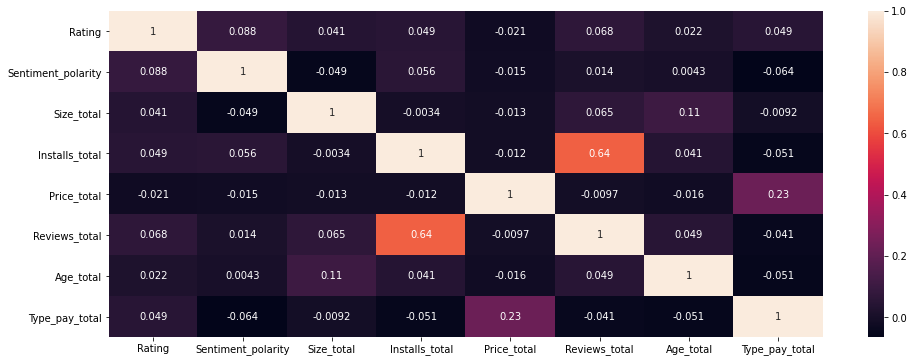

In [30]:
plt.figure(figsize=(16, 6))
sns.heatmap(df_mat_googlestore.corr(),annot=True);

In [31]:
df_mat_googlestore.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Sentiment_polarity', 'Size_total', 'Installs_total',
       'Price_total', 'Reviews_total', 'Age_total', 'Type_pay_total'],
      dtype='object')

In [32]:
#df_mat_alcohol.schoolsup = df_mat_alcohol.schoolsup.eq('yes').mul(1)

In [33]:
one_hot = pd.get_dummies(df_mat_googlestore['Category'])
df_mat_googlestore = df_mat_googlestore.drop('Category',axis = 1)
df_mat_googlestore = df_mat_googlestore.join(one_hot)


one_hot = pd.get_dummies(df_mat_googlestore['Genres'])
df_mat_googlestore = df_mat_googlestore.drop('Genres',axis = 1)
df_mat_googlestore = df_mat_googlestore.join(one_hot)

one_hot = pd.get_dummies(df_mat_googlestore['Android Ver'])
df_mat_googlestore = df_mat_googlestore.drop('Android Ver',axis = 1)
df_mat_googlestore = df_mat_googlestore.join(one_hot)

In [34]:
df_mat_googlestore = df_mat_googlestore.drop(columns=['App', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Last Updated', 'Current Ver'])

In [35]:
df_mat_googlestore

,App,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Sentiment_polarity,Size_total,...,5.0 - 7.1.1,5.0 - 8.0,5.0 and up,5.1 and up,6.0 and up,7.0 - 7.1.1,7.0 and up,7.1 and up,8.0 and up,Varies with device
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19M,"10,000+",Free,0,Everyone,0.000000,19000000.0,...,0,0,0,0,0,0,0,0,0,0
1,Coloring book moana,3.9,967,14M,"500,000+",Free,0,Everyone,0.152652,14000000.0,...,0,0,0,0,0,0,0,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,0.000000,8700000.0,...,0,0,0,0,0,0,0,0,0,0
3,Sketch - Draw & Paint,4.5,215644,25M,"50,000,000+",Free,0,Teen,0.000000,25000000.0,...,0,0,0,0,0,0,0,0,0,0
4,Pixel Draw - Number Art Coloring Book,4.3,967,2.8M,"100,000+",Free,0,Everyone,0.000000,2800000.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,4.5,38,53M,"5,000+",Free,0,Everyone,0.000000,53000000.0,...,0,0,0,0,0,0,0,0,0,0
10837,Fr. Mike Schmitz Audio Teachings,5.0,4,3.6M,100+,Free,0,Everyone,0.000000,3600000.0,...,0,0,0,0,0,0,0,0,0,0
10838,Parkinson Exercices FR,NaN,3,9.5M,"1,000+",Free,0,Everyone,0.000000,9500000.0,...,0,0,0,0,0,0,0,0,0,0
10839,The SCP Foundation DB fr nn5n,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1


In [40]:
import pandas as pd
from sklearn import preprocessing

cols = df_mat_googlestore.columns
x = df_mat_googlestore.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_mat_googlestore = pd.DataFrame(x_scaled, columns =cols )

In [51]:
df_mat_googlestore = df_mat_googlestore.dropna()

In [52]:
def get_MAE(theta, X, y):
    mae = sum(abs(y - X@theta))/len(y)
    return mae

In [53]:
df_train = df_mat_googlestore.loc[:, df_mat_googlestore.columns != 'Installs_total']
X, X_test, Y, Y_test = train_test_split(df_train, 
                                        np.expand_dims(df_mat_googlestore['Installs_total'],1),
                                        test_size=0.5, 
                                        random_state=0)

#adding a bias term
X = np.hstack([np.ones([X.shape[0],1]), X])
X_test = np.hstack([np.ones([X_test.shape[0],1]), X_test])

In [54]:
X

array([[1.        , 0.33333333, 0.59      , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.33333333, 0.059     , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.33333333, 0.039     , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.33333333, 0.084     , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.33333333, 0.46      , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.33333333, 0.        , ..., 0.        , 0.        ,
        1.        ]])

## Question 2.2
Implement below the mean-absolute error regression with LASSO. Use $\lambda=0.5$. Hints: in the X matrix, rows represent data samples. Also, don't forget to add the `1` column to capture the intercept. (Use the `GLPK` solver)

In [55]:
samples_count = X.shape[0]
lam =0.005

theta = cp.Variable((X.shape[1],1))

constraints = []


obj = cp.Minimize(cp.sum(cp.abs(Y - X@theta)) / samples_count + lam*cp.norm(theta, 1))
prob = cp.Problem(obj, constraints)

prob.solve(solver=cp.GLPK)

0.01420597564987768

In [56]:
theta_final = theta.value

In [57]:
columns_train = df_train.columns.tolist()
columns_train.insert(0, 'Intercept')

In [58]:
for i in range(len(theta_final)):
    if(theta_final[i] != 0):
        print('{}: {}'.format(columns_train[i], theta_final[i]))

Intercept: [-0.00027147]
Sentiment_polarity: [0.00090716]
Size_total: [0.00057802]
Reviews_total: [0.17161849]
Type_pay_total: [-7.51846523e-05]
DATING: [-3.78203486e-05]
EDUCATION: [0.00023124]
ENTERTAINMENT: [0.00068211]
FINANCE: [-3.94852244e-05]
GAME: [0.00080802]
MEDICAL: [-6.75935951e-05]
NEWS_AND_MAGAZINES: [-3.02060562e-05]
PHOTOGRAPHY: [0.00077792]
SHOPPING: [6.1253799e-05]
TOOLS: [1.34850138e-05]
Action: [9.18183715e-19]
Business: [-5.28109159e-05]
Communication: [3.8653117e-05]
Education: [-4.59396535e-05]
Entertainment: [-2.89004086e-05]
Lifestyle: [-3.08366186e-05]
4.0.3 and up: [-1.23149115e-05]
4.4 and up: [8.66397627e-06]
Varies with device: [0.00571433]


In [59]:
from sklearn.metrics import mean_absolute_error as mae

In [60]:
print(color.BOLD + 'Training Results' + color.END)
print('MAE: {}'.format(mae(X @ theta_final, Y)))
print('\n')
print(color.BOLD + 'Test Results' + color.END)
print('MAE: {}'.format(mae(X_test @ theta_final, Y_test)))

Training Results
MAE: 0.01329531617633118


Test Results
MAE: 0.012960168345251247
